In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import chainladder as cl

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Importer et mettre en forme le triangle sous format csv

##### 1. Parameters #####

In [2]:
filepath = "IZAR_Input_ResQ_Paid.txt"
First_UWY = 1963
Run_Off_Year = 2006
Closing_Year = 2015
Seg = "2GL2"
Risk = "Attri"
Pays = None

##### 2. Reading from IZAR #####

In [3]:
'Traitement par code segment'
IZAR = pd.read_csv(filepath, sep= '\t', decimal=",")
AY = np.arange(First_UWY,Run_Off_Year+1)
DY = np.arange(12,(Closing_Year-First_UWY+1)*12 + 1,12) 
data = IZAR.loc[(IZAR.Attri_ML==Risk) & (IZAR.Code_segment==Seg)]
if (Pays != None):
    data = data.loc[data.IBNR_Sub_Segment == Pays]
data_groupby = data.groupby(['Annee_de_souscription','Devlopement'])
data = data_groupby[['Paid','OS']].sum().reset_index()


##### 3. Creation of Incurred dataframe #####

In [4]:
'Triangle des paid'
data_Paid = data.loc[:,['Annee_de_souscription','Devlopement','Paid']].sort_values(by=['Annee_de_souscription','Devlopement'])
tri_inc_paid = cl.Triangle(data_Paid, origin="Annee_de_souscription", dev="Devlopement", values="Paid",dataform = "triangle")
tri_inc_paid.data_as_triangle(inplace=True)
tri_cum_paid = tri_inc_paid.incr_to_cum(inplace=False)
     
'Triangle des OS : Les OS ne doivent pas être cumules'
data_OS = data[['Annee_de_souscription','Devlopement','OS']].sort_values(by=['Annee_de_souscription'])
tri_OS = cl.Triangle(data_OS, origin="Annee_de_souscription", dev="Devlopement", values="OS", dataform ="triangle")
tri_OS = tri_OS.data_as_triangle(inplace=True) 
    
'Creation du triangle incurred'
Incurred = tri_OS + tri_cum_paid

##### 4. Final triangle #####

In [5]:
'Creation du triangle final'

'Paid'
Data1 = cl.Triangle(pd.DataFrame(0, index=list(AY), columns=list(DY)), origin="Annee_de_souscription", dev="Devlopement", dataform ="triangle").data
Data1.update(tri_cum_paid)
PcumTr = cl.Triangle(Data1, origin="Annee_de_souscription", dev="Devlopement" ,dataform ="triangle")
Paid_Cum = PcumTr.data
Paid_inc = PcumTr.cum_to_incr(inplace=False)

'OS'
Data2 = cl.Triangle(pd.DataFrame(0, index=list(AY), columns=list(DY)), origin="Annee_de_souscription", dev="Devlopement", dataform ="triangle").data
Data2.update(tri_OS)
OS = cl.Triangle(Data2, origin="Annee_de_souscription", dev="Devlopement", dataform ="triangle").data
      
'Incurred'
Data3 = cl.Triangle(pd.DataFrame(0, index=list(AY), columns=list(DY)), origin="Annee_de_souscription", dev="Devlopement", dataform ="triangle").data
Data3.update(Incurred)
Incurred = cl.Triangle(Data3, origin="Annee_de_souscription", dev="Devlopement", dataform ="triangle").data


##### 5. Visualization #####

In [6]:
# Uncomment to visualize at each time

# Incurred
# Paid_inc
# OS
# Paid_Cum

### IZAR analysis

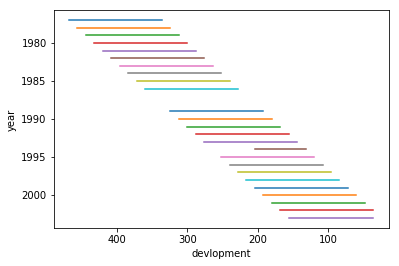

In [6]:
# Affichage 
for i in data.Annee_de_souscription.unique():
    yy = np.arange(data[data.Annee_de_souscription==i].Devlopement.min(),data[data.Annee_de_souscription==i].Devlopement.max()+1)
    horz = np.array([i for j in range(len(yy))])
    plt.plot(yy,horz)
    plt.xlabel('devlopment')
    plt.ylabel('year')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
plt.show()

In [7]:
#size of development segment
occurence = []
first_dev = []
last_dev = []
for i in data.Annee_de_souscription.unique():
    occurence.append(data[data.Annee_de_souscription==i].Devlopement.count())
    first_dev.append(data[data.Annee_de_souscription==i].Devlopement.min())
    last_dev.append(data[data.Annee_de_souscription==i].Devlopement.max())
# Uncomment to learn about data
# occurence
# first_dev
# last_dev

### Random Triangle process

In [40]:
first_dev = 300 # First development in the first year / must first_dev > val_dev*len(year_list)
len_dev = 10 # gap between each development in a year
val_dev = len_dev # number of development by year
begin_date = 1977
end_date = 2003


AY = np.arange(First_UWY,Run_Off_Year+1)
DY = np.arange(len_dev,(Closing_Year-First_UWY+1)*len_dev + 1,len_dev) 
year_list = np.arange(begin_date, end_date+1)
ctr = 0 
df = pd.DataFrame(index =np.arange(len(year_list)*(val_dev+1)) ,columns=["Annee_de_souscription","Devlopement","Paid","OS"] )
devList = []
yearSousList = []
for i in year_list:
    devList = np.append(devList,np.arange(first_dev+ctr,first_dev+(len_dev*val_dev)+ctr+1,len_dev).T)
    yearSousList = np.append(yearSousList,np.array([i for j in range(val_dev+1)]).T)
    ctr -= val_dev
df.Devlopement = pd.Series(devList)
df.Annee_de_souscription= pd.Series(yearSousList)
df.Paid = np.random.normal(data.Paid.mean(), data.Paid.std(), df.Annee_de_souscription.shape[0])
df.OS = np.random.normal(data.OS.mean(), data.OS.std(), df.Annee_de_souscription.shape[0])
df.Annee_de_souscription = df.Annee_de_souscription.astype(int)
df.Devlopement = df.Devlopement.astype(int)


'Triangle des paid'
df_data_Paid = df.loc[:,['Annee_de_souscription','Devlopement','Paid']].sort_values(by=['Annee_de_souscription','Devlopement'])
df_inc_paid = cl.Triangle(df_data_Paid, origin="Annee_de_souscription", dev="Devlopement", values="Paid",dataform = "triangle")
df_inc_paid.data_as_triangle(inplace=True)
df_cum_paid = df_inc_paid.incr_to_cum(inplace=False)
     
'Triangle des OS : Les OS ne doivent pas être cumules'
df_data_OS = df.loc[:,['Annee_de_souscription','Devlopement','OS']].sort_values(by=['Annee_de_souscription','Devlopement'])
df_OS = cl.Triangle(df_data_OS, origin="Annee_de_souscription", dev="Devlopement", values="OS", dataform ="triangle")
df_OS = df_OS.data_as_triangle(inplace=True) 
    
'Creation du triangle incurred'
df_Incurred = df_OS + df_cum_paid


'Creation du triangle final'

'Paid'
df_Data1 = cl.Triangle(pd.DataFrame(0, index=list(AY), columns=list(DY)), origin="Annee_de_souscription", dev="Devlopement", dataform ="triangle").data
df_Data1.update(df_cum_paid)
df_PcumTr = cl.Triangle(df_Data1, origin="Annee_de_souscription", dev="Devlopement" ,dataform ="triangle")
df_Paid_Cum = df_PcumTr.data
df_Paid_inc = df_PcumTr.cum_to_incr(inplace=False)

'OS'
df_Data2 = cl.Triangle(pd.DataFrame(0, index=list(AY), columns=list(DY)), origin="Annee_de_souscription", dev="Devlopement", dataform ="triangle").data
df_Data2.update(df_OS)
df_OS = cl.Triangle(df_Data2, origin="Annee_de_souscription", dev="Devlopement", dataform ="triangle").data
      
'Incurred'
df_Data3 = cl.Triangle(pd.DataFrame(0, index=list(AY), columns=list(DY)), origin="Annee_de_souscription", dev="Devlopement", dataform ="triangle").data
df_Data3.update(df_Incurred)
df_Incurred = cl.Triangle(df_Data3, origin="Annee_de_souscription", dev="Devlopement", dataform ="triangle").data

### Random triangle vizualisation

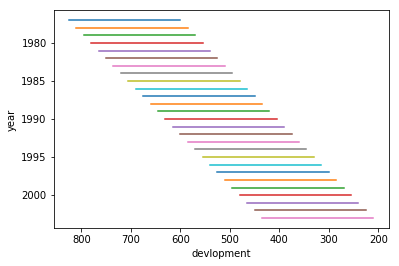

In [41]:
for i in df.Annee_de_souscription.unique():
    yy = np.arange(df[df.Annee_de_souscription==i].Devlopement.min(),df[df.Annee_de_souscription==i].Devlopement.max()+1)
    horz = np.array([i for j in range(len(yy))])
    plt.plot(yy,horz)
    plt.xlabel('devlopment')
    plt.ylabel('year')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
plt.show()

In [42]:
df_Incurred

,15,30,45,60,75,90,105,120,135,150,...,660,675,690,705,720,735,750,765,780,795
1963,0,0,0,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1964,0,0,0,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1965,0,0,0,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1966,0,0,0,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1967,0,0,0,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1968,0,0,0,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1969,0,0,0,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1970,0,0,0,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1971,0,0,0,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1972,0,0,0,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
